In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class KalmanFilter:
    def __init__(self, initial_state, initial_uncertainty, process_noise, measurement_noise):
        self.state = np.array(initial_state, dtype=float)  # State [position, velocity, acceleration]
        self.uncertainty = np.array(initial_uncertainty, dtype=float)  # Uncertainty in the state
        self.process_noise = np.array(process_noise, dtype=float)  # Process noise (model uncertainty)
        self.measurement_noise = measurement_noise  # Measurement noise (sensor uncertainty)
        self.history = {
            'state': [],
            'uncertainty': [],
        }

    def predict(self):
        # State transition matrix (including acceleration)
        F = np.array([[1, 1, 0.5],  # Position update
                      [0, 1, 1],    # Velocity update
                      [0, 0, 1]])   # Acceleration remains constant

        # Predict the next state
        self.state = F @ self.state
        self.uncertainty = F @ self.uncertainty @ F.T + self.process_noise

        # Store state and uncertainty for visualization
        self.history['state'].append(self.state.copy())
        self.history['uncertainty'].append(self.uncertainty.copy())

    def update(self, measurement):
        # Measurement matrix (we measure position and velocity)
        H = np.array([[1, 0, 0],  # Measuring position
                      [0, 1, 0]]) # Measuring velocity

        # Measurement residual
        y = measurement - (H @ self.state)

        # Residual covariance
        S = H @ self.uncertainty @ H.T + self.measurement_noise

        # Kalman Gain
        K = self.uncertainty @ H.T @ np.linalg.inv(S)

        # Update the state with the measurement
        self.state = self.state + K @ y

        # Update the uncertainty
        I = np.eye(self.uncertainty.shape[0])
        self.uncertainty = (I - K @ H) @ self.uncertainty

        # Store state and uncertainty for visualization
        self.history['state'].append(self.state.copy())
        self.history['uncertainty'].append(self.uncertainty.copy())

    def get_state(self):
        return self.state  # Return the full state estimate

In [3]:
# Example usage:
# Initial parameters
initial_state = [0.0, 0.0, 0.0]  # Starting with an initial guess (position, velocity, acceleration)
initial_uncertainty = np.eye(3)  # Initial uncertainty in the state (identity matrix)
process_noise = np.diag([1e-5, 1e-5, 1e-5])  # Process noise (small values for all states)
measurement_noise = np.diag([0.1, 0.1])  # Measurement noise (position, velocity)

In [4]:
kf = KalmanFilter(initial_state, initial_uncertainty, process_noise, measurement_noise)

In [5]:
# Simulated measurements (position and velocity) for demonstration
measurements = np.array([
    [1.0, 0.2],
    [2.0, 0.3],
    [1.5, 0.4],
    [1.8, 0.5],
    [2.2, 0.6],
    [2.5, 0.7],
    [2.8, 0.8]
])

In [6]:
predictions = []

In [7]:
for i, measurement in enumerate(measurements):
    kf.predict()
    kf.update(measurement)
    predicted_state = kf.get_state()
    predictions.append(predicted_state)
    print(f"Time Step {i+1}: Measured Position = {measurement[0]}, Measured Velocity = {measurement[1]}, Predicted State = {predicted_state}")

Time Step 1: Measured Position = 1.0, Measured Velocity = 0.2, Predicted State = [ 0.93296163  0.23836056 -0.04841372]
Time Step 2: Measured Position = 2.0, Measured Velocity = 0.3, Predicted State = [1.67558953 0.45420694 0.03766552]
Time Step 3: Measured Position = 1.5, Measured Velocity = 0.4, Predicted State = [ 1.76980495  0.25836415 -0.04537391]
Time Step 4: Measured Position = 1.8, Measured Velocity = 0.5, Predicted State = [1.97674792e+00 2.83365614e-01 1.10816590e-03]
Time Step 5: Measured Position = 2.2, Measured Velocity = 0.6, Predicted State = [2.31507051 0.37533732 0.03900371]
Time Step 6: Measured Position = 2.5, Measured Velocity = 0.7, Predicted State = [2.6710217  0.43513164 0.05100142]
Time Step 7: Measured Position = 2.8, Measured Velocity = 0.8, Predicted State = [3.03091575 0.47215723 0.0526801 ]


In [8]:
# Extract position, velocity, and acceleration predictions
positions = [state[0] for state in predictions]
velocities = [state[1] for state in predictions]
accelerations = [state[2] for state in predictions]

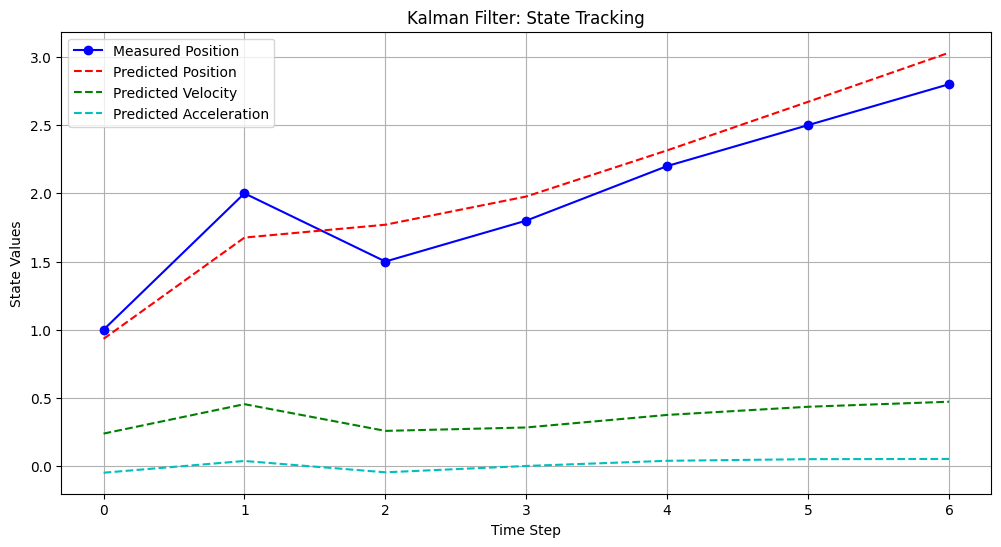

In [9]:
# Visualization: State Estimates
plt.figure(figsize=(12, 6))
plt.plot(measurements[:, 0], 'bo-', label='Measured Position')
plt.plot(positions, 'r--', label='Predicted Position')
plt.plot(velocities, 'g--', label='Predicted Velocity')
plt.plot(accelerations, 'c--', label='Predicted Acceleration')
plt.xlabel('Time Step')
plt.ylabel('State Values')
plt.title('Kalman Filter: State Tracking')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
# Visualization: Heatmaps of Uncertainty
uncertainties = np.array(kf.history['uncertainty'])

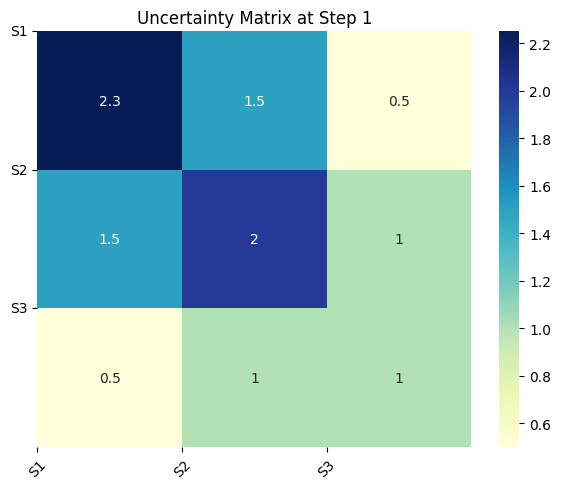

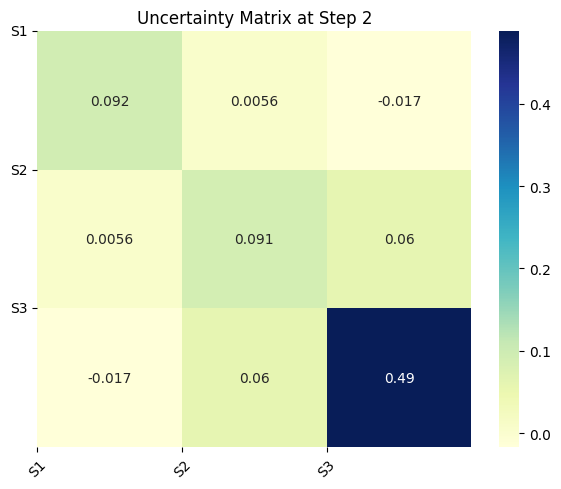

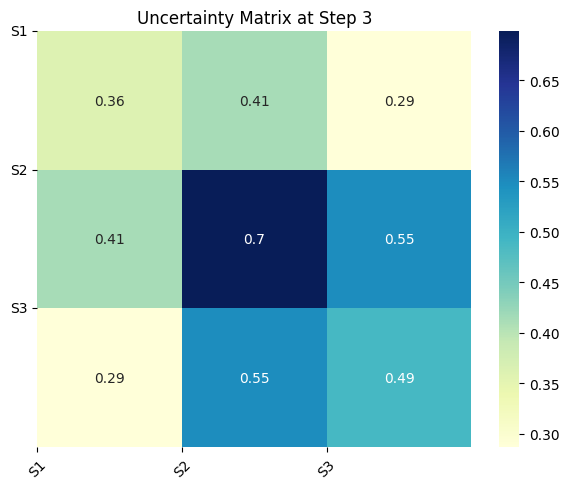

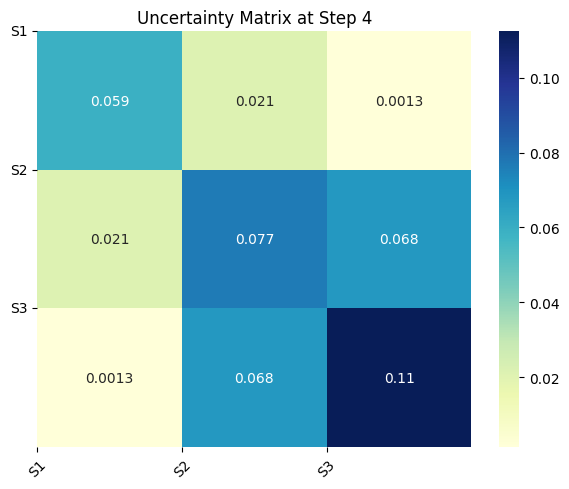

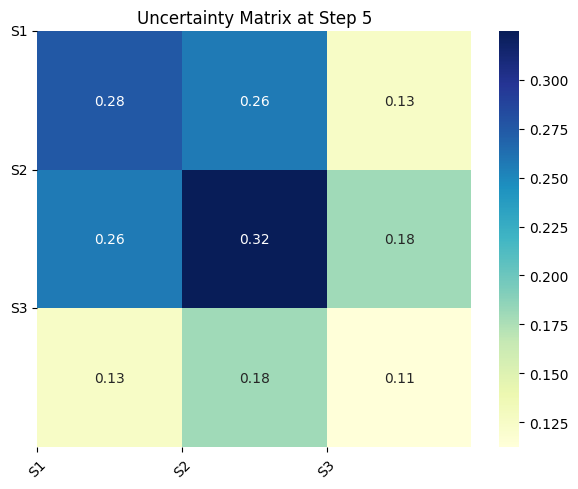

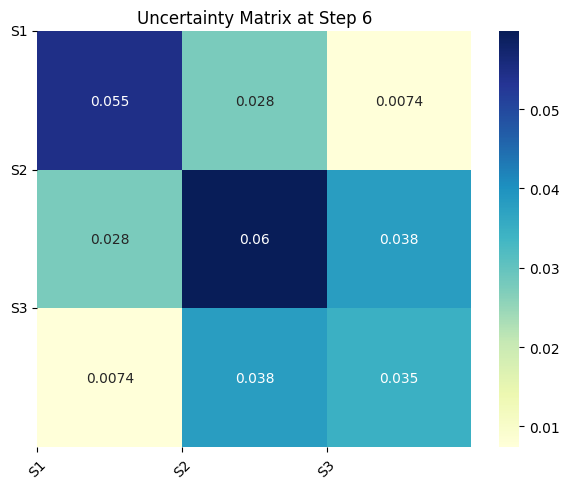

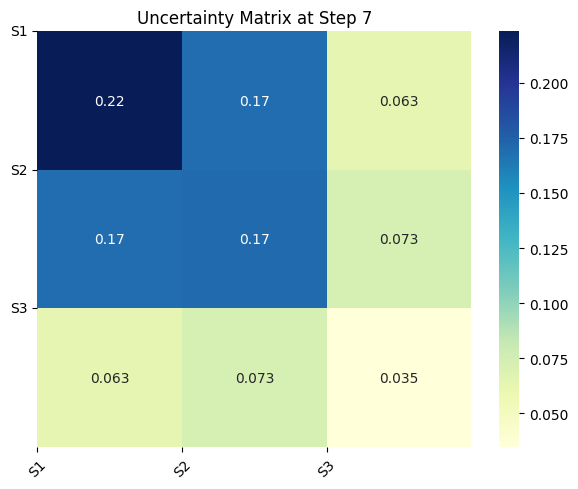

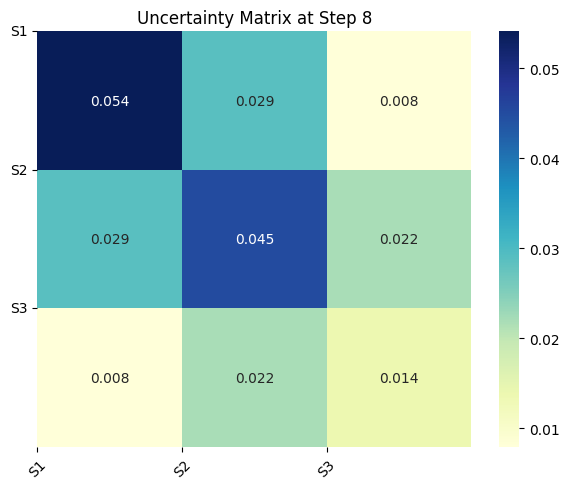

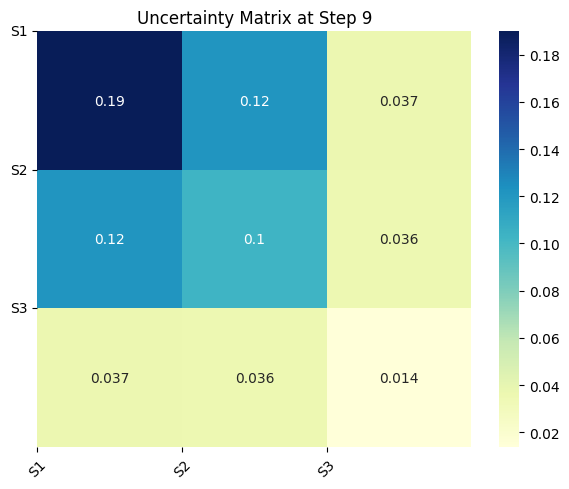

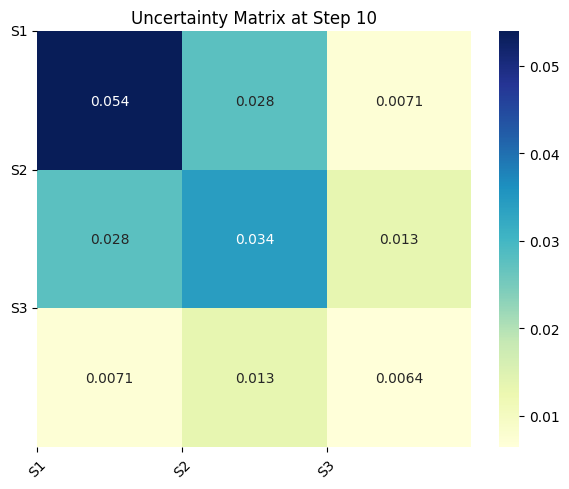

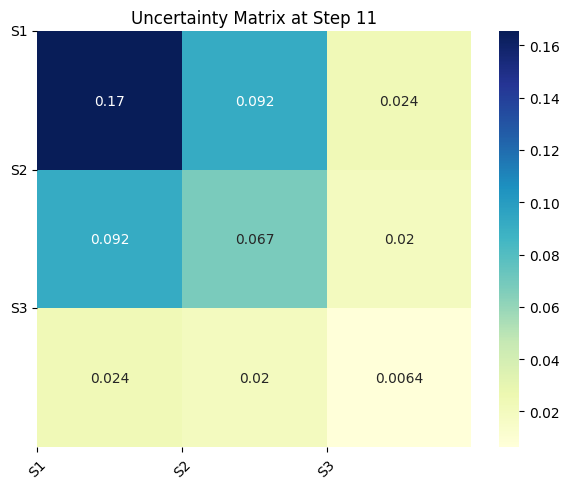

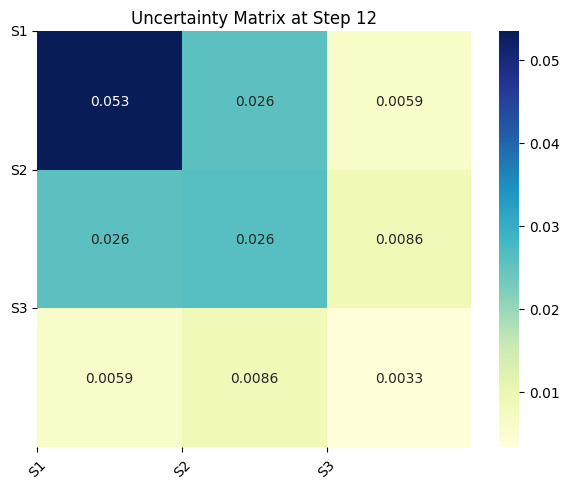

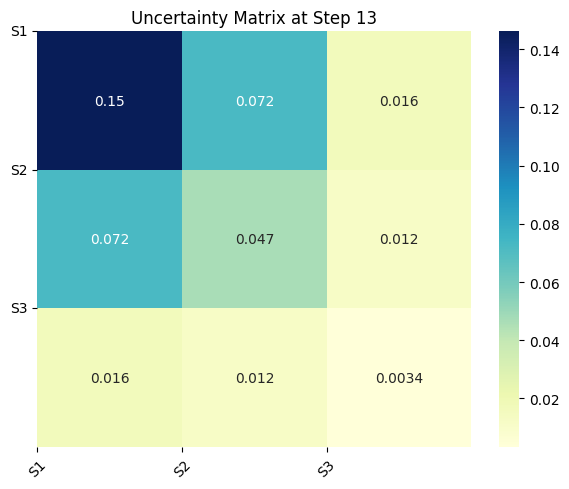

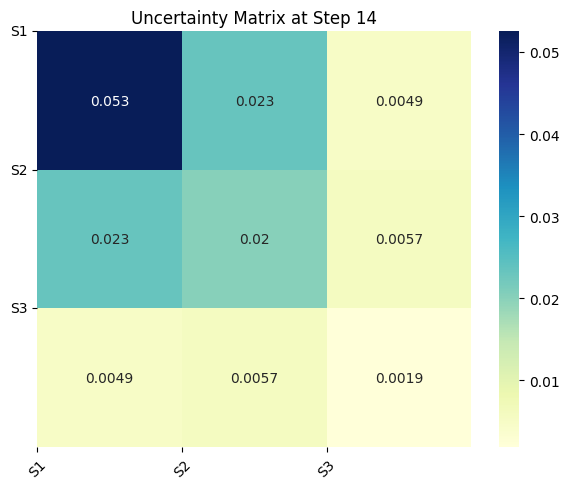

In [11]:
# Loop through each step to create separate heatmaps
for i in range(uncertainties.shape[0]):
    plt.figure(figsize=(6, 5))
    sns.heatmap(uncertainties[i], annot=True, cmap="YlGnBu", cbar=True)
    plt.title(f'Uncertainty Matrix at Step {i+1}')
    plt.xticks(ticks=np.arange(uncertainties[i].shape[0]), labels=[f'S{i+1}' for i in range(uncertainties[i].shape[0])], rotation=45)
    plt.yticks(ticks=np.arange(uncertainties[i].shape[1]), labels=[f'S{i+1}' for i in range(uncertainties[i].shape[1])], rotation=0)
    plt.tight_layout()
    plt.show()